In [353]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [354]:
EVAL_FOLDER_PATH = os.path.join('..', 'runs', 'eval')

In [355]:
situations = [
    "has-food-in-nest", # DROP FOOD
    "has-food-out-nest", # FOLLOW NEST PHEROMONE WHILE RELEASING FOOD PHEROMONE
    "food-available-in-nest", # FOLLOW FOOD PHEROMONE
    "food-available-out-nest", # TAKE FOOD
    "food-not-available" # FOLLOW FOOD PHEROMONE
]

In [356]:
file_subfolder = 'eval_04_09_2025__19_19_47'
output_file_name = 'iql_eval_output_04_09_2025__19_19_47.csv'

output_complete_path = os.path.join(EVAL_FOLDER_PATH, file_subfolder, output_file_name)

In [357]:
df = pd.read_csv(output_complete_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 56 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Episode                                                               2000 non-null   int64  
 1   Tick                                                                  2000 non-null   int64  
 2   Avg reward X episode                                                  2000 non-null   float64
 3   random-walk                                                           2000 non-null   int64  
 4   lay-food-pheromone                                                    2000 non-null   int64  
 5   follow-food-pheromone                                                 2000 non-null   int64  
 6   follow-nest-pheromone                                                 2000 non-null   int64  
 7

In [358]:
situations_dict = {}
for situation in situations:
    situations_dict[situation] = df.filter(like = situation).loc[:, df.filter(like = situation).any()]

In [359]:
situations_dict["has-food-out-nest"].div(situations_dict["has-food-out-nest"]["has-food-out-nest"], axis = "index").drop(["has-food-out-nest"], axis = 1).mean()

has-food-out-nest_follow-nest-pheromone                           0.498426
has-food-out-nest_follow-nest-pheromone-and-lay-food-pheromone    0.501574
dtype: float64

In [360]:
percentage_dict = {}
for situation in situations:
    percentage_dict[situation] = situations_dict[situation].div(situations_dict[situation][situation], axis = "index").drop([situation], axis = 1).mean()
    print()
    print(percentage_dict[situation])
    


has-food-in-nest_drop-food    1.0
dtype: float64

has-food-out-nest_follow-nest-pheromone                           0.498426
has-food-out-nest_follow-nest-pheromone-and-lay-food-pheromone    0.501574
dtype: float64

food-available-in-nest_random-walk              0.492112
food-available-in-nest_follow-food-pheromone    0.507888
dtype: float64

food-available-out-nest_take-food    1.0
dtype: float64

food-not-available_random-walk              0.480368
food-not-available_follow-food-pheromone    0.519632
dtype: float64


In [361]:
labels_dict = {
    "has-food-in-nest" : ["drop food"], 
    "has-food-out-nest" : ["follow nest ph. and release food ph.", "follow nest ph."],
    "food-available-in-nest" : ["follow nest ph. and release food ph.", "follow nest ph."], 
    "food-available-out-nest" : ["take food"], 
    "food-not-available": ["follow food ph.", "random walk"], 
}

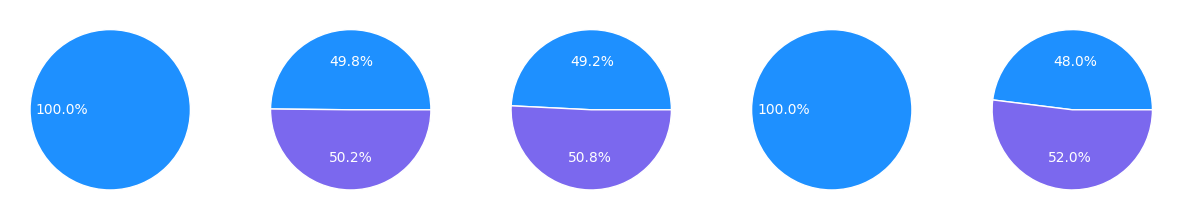

In [362]:
fig, axes = plt.subplots(1, 5, figsize = (15, 70))
for i, situation in enumerate(situations):
    axes[i].pie(percentage_dict[situation], autopct='%1.1f%%', textprops=dict(color="w"), colors = ["dodgerblue", "mediumslateblue"], wedgeprops = {"linewidth": 1, "edgecolor": "white"}, labeldistance = None)
    #axes[i].legend()
plt.show()

In [363]:
pickle_file_name = 'iql_eval_pickle_04_09_2025__19_19_47.pkl'

pickle_complete_path = os.path.join(EVAL_FOLDER_PATH, file_subfolder, pickle_file_name)

In [364]:
import pickle

with open(pickle_complete_path, 'rb') as f:
    agents_situations_actions_dict = pickle.load(f)


In [365]:
import pandas as pd
agents_situations_actions_df = pd.DataFrame.from_dict({(level1, level2, level3): value
                             for level1, inner_dict in agents_situations_actions_dict.items()
                             for level2, inner_inner_dict in inner_dict.items()
                             for level3, value in inner_inner_dict.items()}, orient='index')

In [366]:
agents_situations_actions_df

0  1    2  3  4  5  6   7
1    0  has-food-in-nest           0  0    0  0  0  3  0   0
        has-food-out-nest          0  0    0  4  0  0  0  33
        food-available-in-nest     7  0    0  0  0  0  0   0
        food-available-out-nest    0  0    0  0  3  0  0   0
        food-not-available        15  0  143  0  0  0  0   0
...                              ... ..  ... .. .. .. ..  ..
2000 49 has-food-in-nest           0  0    0  0  0  2  0   0
        has-food-out-nest          0  0    0  3  0  0  0  25
        food-available-in-nest     0  0    5  0  0  0  0   0
        food-available-out-nest    0  0    0  0  2  0  0   0
        food-not-available       104  0  178  0  0  0  0   0

[500000 rows x 8 columns]

In [367]:
agents_situations_actions_df = agents_situations_actions_df.reset_index().rename({"level_0": "Episode", "level_1": "Agent", "level_2" : "Situation"}, axis = 1)
agents_situations_actions_df

,Episode,Agent,Situation,0,1,2,3,4,5,6,7
0,1,0,has-food-in-nest,0,0,0,0,0,3,0,0
1,1,0,has-food-out-nest,0,0,0,4,0,0,0,33
2,1,0,food-available-in-nest,7,0,0,0,0,0,0,0
3,1,0,food-available-out-nest,0,0,0,0,3,0,0,0
4,1,0,food-not-available,15,0,143,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
499995,2000,49,has-food-in-nest,0,0,0,0,0,2,0,0
499996,2000,49,has-food-out-nest,0,0,0,3,0,0,0,25
499997,2000,49,food-available-in-nest,0,0,5,0,0,0,0,0
499998,2000,49,food-available-out-nest,0,0,0,0,2,0,0,0


In [368]:
agents_situations_actions_df = agents_situations_actions_df.groupby(["Agent", "Situation"]).sum(['0', '1', '2', '3', '4', '5', '6', '7'])
agents_situations_actions_df

0  1       2      3     4     5  6      7
Agent Situation                                                              
0     food-available-in-nest    10898  0    4460      0     0     0  0      0
      food-available-out-nest       0  0       0      0  3691     0  0      0
      food-not-available        65649  0  446197      0     0     0  0      0
      has-food-in-nest              0  0       0      0     0  3691  0      0
      has-food-out-nest             0  0       0   1557     0     0  0  40599
...                               ... ..     ...    ...   ...   ... ..    ...
9     food-available-in-nest     1900  0    8126      0     0     0  0      0
      food-available-out-nest       0  0       0      0  3476     0  0      0
      food-not-available       290635  0  228139      0     0     0  0      0
      has-food-in-nest              0  0       0      0     0  3476  0      0
      has-food-out-nest             0  0       0  22616     0     0  0  18040

[250 rows x 8 columns]

In [369]:
agents_situations_actions_df.div(agents_situations_actions_df.sum(axis = 1), axis = 0).fillna(0.0)

0    1         2         3    4    5  \
Agent Situation                                                              
0     food-available-in-nest   0.709598  0.0  0.290402  0.000000  0.0  0.0   
      food-available-out-nest  0.000000  0.0  0.000000  0.000000  1.0  0.0   
      food-not-available       0.128259  0.0  0.871741  0.000000  0.0  0.0   
      has-food-in-nest         0.000000  0.0  0.000000  0.000000  0.0  1.0   
      has-food-out-nest        0.000000  0.0  0.000000  0.036934  0.0  0.0   
...                                 ...  ...       ...       ...  ...  ...   
9     food-available-in-nest   0.189507  0.0  0.810493  0.000000  0.0  0.0   
      food-available-out-nest  0.000000  0.0  0.000000  0.000000  1.0  0.0   
      food-not-available       0.560234  0.0  0.439766  0.000000  0.0  0.0   
      has-food-in-nest         0.000000  0.0  0.000000  0.000000  0.0  1.0   
      has-food-out-nest        0.000000  0.0  0.000000  0.556277  0.0  0.0   

                                 6         7  
Agent Situation                               
0     food-available-in-nest   0.0  0.000000  
      food-available-out-nest  0.0  0.000000  
      food-not-available       0.0  0.000000  
      has-food-in-nest         0.0  0.000000  
      has-food-out-nest        0.0  0.963066  
...                            ...       ...  
9     food-available-in-nest   0.0  0.000000  
      food-available-out-nest  0.0  0.000000  
      food-not-available       0.0  0.000000  
      has-food-in-nest         0.0  0.000000  
      has-food-out-nest        0.0  0.443723  

[250 rows x 8 columns]

In [370]:
agents_situations_actions_df.idxmax(axis = "columns")

Agent  Situation              
0      food-available-in-nest     0
       food-available-out-nest    4
       food-not-available         2
       has-food-in-nest           5
       has-food-out-nest          7
                                 ..
9      food-available-in-nest     2
       food-available-out-nest    4
       food-not-available         0
       has-food-in-nest           5
       has-food-out-nest          3
Length: 250, dtype: object

In [371]:
res = agents_situations_actions_df.idxmax(axis = "columns").groupby(["Situation"]).value_counts()
res

Situation                 
food-available-in-nest   0    26
                         2    24
food-available-out-nest  4    50
food-not-available       2    30
                         0    20
has-food-in-nest         5    50
has-food-out-nest        7    26
                         3    24
Name: count, dtype: int64

In [372]:
sum_res = res.reset_index().rename({"level_1": "Action"}, axis = 1).loc[:, ["Situation", "count"]].groupby(["Situation"]).sum()
sum_res

,count
Situation,
food-available-in-nest,50
food-available-out-nest,50
food-not-available,50
has-food-in-nest,50
has-food-out-nest,50


<Axes: xlabel='Situation,None'>

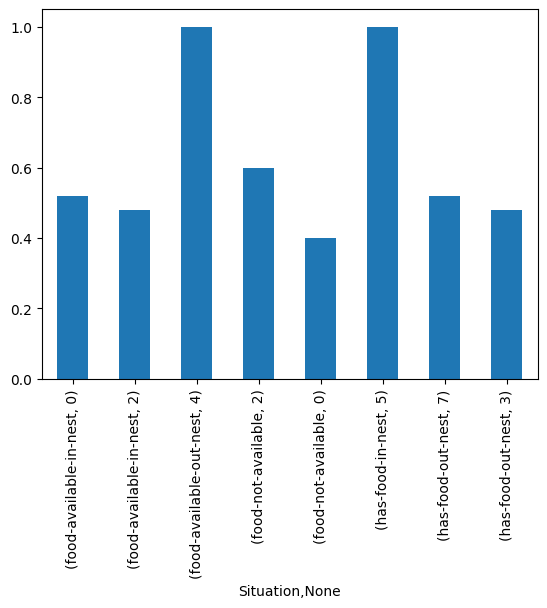

In [373]:
(res/50).plot.bar()